# IS 362 – Week 8 Assignment 

### Author: KHAIRUL CHOWDHURY 

Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables. Here is a link to the “Auto MPG” dataset in the UC Irvine data repository: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.
2. Review the data and the provided data set description.
3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.
4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.
5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’
6. Create a bar chart that shows the distribution for cylinders.
7. Create a scatterplot that shows the relationship between horsepower and weight.
8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

In [11]:
#importing pandas & seaborn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

###### Now we input the data from the file: Auto MPG

In [12]:
#inputting Auto MPG and reading the file. Assigning names to each column as requested 

auto_mpg = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                         sep = '\s+',
                         names = ['mpg', 'cylinders', 'displacement','horsepower','weight', 'acceleration',
                                  'model year', 'origin', 'car name'],
                         header = None).set_index('car name')

auto_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.00,2790.0,15.6,82,1
vw pickup,44.0,4,97.0,52.00,2130.0,24.6,82,2
dodge rampage,32.0,4,135.0,84.00,2295.0,11.6,82,1



From reviewing the data we can see some of the data in " horsepower " are " ? ".

We now want to begin changing data types so it becomes easier to convert these fileds to numeric values.

In [13]:
#Checking the data types
auto_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [14]:
#replacing the "?" with appropiate missing values such as NaN or 0
auto_mpg.replace(to_replace = '?', value = np.NaN)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.00,2790.0,15.6,82,1
vw pickup,44.0,4,97.0,52.00,2130.0,24.6,82,2
dodge rampage,32.0,4,135.0,84.00,2295.0,11.6,82,1


###### Changing the data types using pd.to_numeric() and confirming the changes to data types.

In [15]:
#changing data types using pd.to_numeric() 
#confirming data type has changed for horsepower from "object" to "float" 

auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower']
                                       , errors = 'coerce')
auto_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

###### The data types were changed. Now we can change " origin " column values.

In [16]:
#converting origin values 1, 2, & 3 to "USA, Asia, & Europe" 
auto_mpg['origin'].replace({1:'USA',
                            2:'Asia',
                            3:'Europe'},
                           inplace = True)
auto_mpg.head(20) #for quicker viewing only displayed the first 20 rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,USA
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,USA
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,USA
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,USA
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,USA
ford galaxie 500,15.0,8,429.0,198.0,4341.0,10.0,70,USA
chevrolet impala,14.0,8,454.0,220.0,4354.0,9.0,70,USA
plymouth fury iii,14.0,8,440.0,215.0,4312.0,8.5,70,USA
pontiac catalina,14.0,8,455.0,225.0,4425.0,10.0,70,USA


###### A bar chart showing the distribution for cylinders.

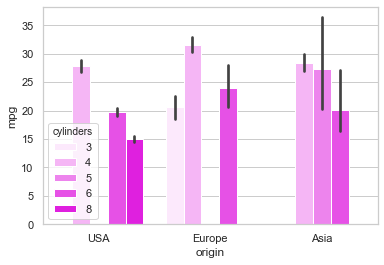

In [17]:
#seaborn bar chart for cylinders

sns.set_style('whitegrid')

sns.barplot(data = auto_mpg,
            x = 'origin',
            y = 'mpg',
            hue = 'cylinders',
            color = 'magenta')
sns.set()

Text(33.63419864004631, 0.5, 'Weight')

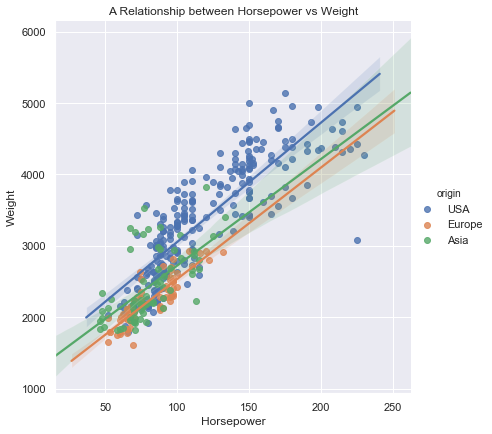

In [18]:
#seaborn scatterplot for horsepower vs weight

sns.lmplot(data = auto_mpg,
           x = 'horsepower',
           y = 'weight',
           hue = 'origin',
           size = 6)

plt.title('A Relationship between Horsepower vs Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')

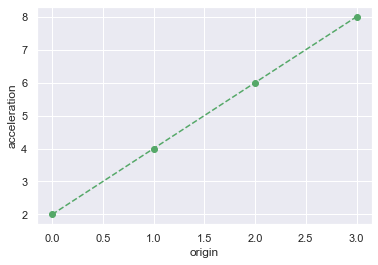

In [19]:

plt.plot([2,4,6,8],
         linestyle = '--',
        marker = 'o',
        color = 'g')

plt.xlabel('origin')
plt.ylabel('acceleration')
plt.show()

What is the distribution for acceleration?

USING SEABORN

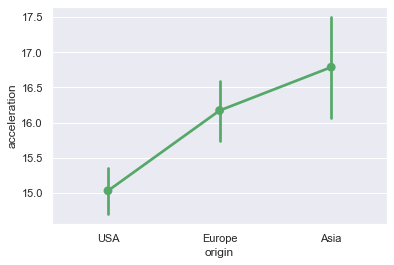

In [20]:
#line chart for acceleration using seaborn

sns.pointplot(x = 'origin',
              y = 'acceleration',
              data = auto_mpg,
             markers = 'o',
             color = 'g')

# THANK YOU!